In [1]:
import os
import h5py
import matplotlib.pyplot as plt

import bcfind.data_augmentation as d_aug
import bcfind.data_generator as d_gen

2021-10-13 12:01:51.651832: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


ImportError: cannot import name 'BCFind' from 'bcfind.bcfind' (/home/curzio/Python/Envs/bcfind/lib/python3.8/site-packages/bcfind/bcfind.py)

In [2]:
data_dir = '/home/curzio/Documents/LENS/Heart_nuclei_(Cami)/Sample'

In [3]:
files = [f for f in os.listdir(data_dir) if f.endswith('.tif') and f.split('.')[0].endswith('green')]

x_file = f"{data_dir}/X.h5"
y_file = f"{data_dir}/Y.h5"

with h5py.File(x_file, 'r') as fx:
    X = fx['x'][()]
with h5py.File(y_file, 'r') as fy:
    Y = fy['y'][()]

In [4]:
data_gen = d_gen.BatchGenerator(X, Y, 3, [240, 240, 80])


In [5]:
x_batch, y_batch = data_gen[0]

new_batch = d_aug.random_noise(x_batch, [15, 25], 1.2)
new_batch[0].shape

(240, 240, 80, 1)

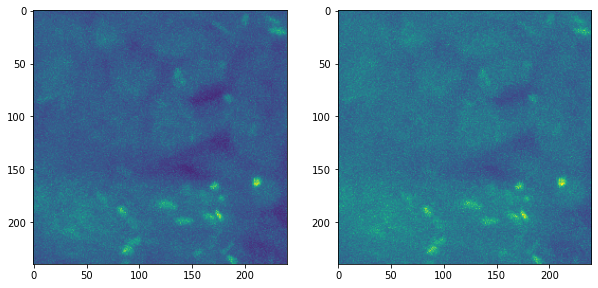

In [6]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(x_batch[0].max((2,3)), vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(new_batch[0].max((2,3)), vmin=0, vmax=255)

In [7]:
aug_gen = d_aug.Augmentor(data_gen)
aug_gen.add_random_gamma([0.2, 2.5])
aug_gen.add_random_gauss_filter([1, 3])
aug_gen.add_random_zoom([1, 2.5])

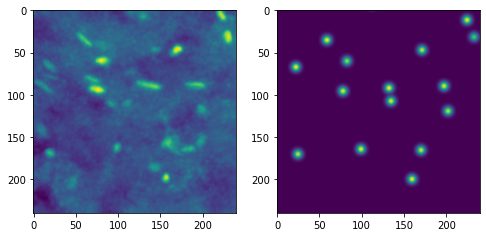

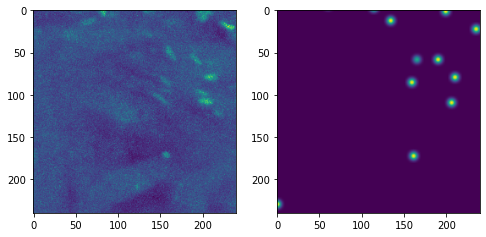

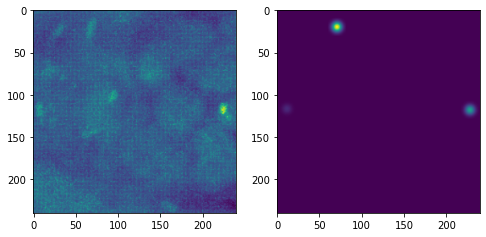

In [9]:
for epoch in range(3):
    for x, y in iter(aug_gen):
        plt.figure(figsize=(8,8))
        plt.subplot(121)
        plt.imshow(x[0].max((2,3)))
        plt.subplot(122)
        plt.imshow(y[0].max((2,3)))
        plt.show()